In [1]:
import requests, gzip
import numpy as np
def fetch(url):
    return np.frombuffer(gzip.decompress(requests.get(url).content), dtype = np.uint8).copy()

In [4]:
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]


X_train_1 = X_train[0:30000]
X_train_2 = X_train[30000:]
Y_train_1 = Y_train[0:30000]
Y_train_2 = Y_train[30000:]

X_test_1 = X_test[0:30000]
X_test_2 = X_test[30000:]
Y_test_1 = Y_test[0:30000]
Y_test_2 = Y_test[30000:]


(<matplotlib.image.AxesImage at 0x7f79f82c19d0>, 5)

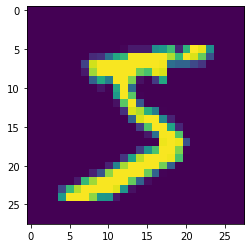

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0]), Y_train[0]

In [6]:
import torch
import torch.nn as nn

In [7]:
class MNet(torch.nn.Module):
    def __init__(self):
        super(MNet, self).__init__()
        self.l1 = nn.Linear(784, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x


In [32]:
model = MNet()

batchsize = 32
loss_function = nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses = []
accuracies = []


for i in range(1000):
    samples = np.random.randint(0,X_train_1.shape[0], size = batchsize)
    X = torch.tensor(X_train_1[samples].reshape((-1,28*28))).float()
    Y = torch.tensor(Y_train_1[samples]).long()
    optimizer.zero_grad()
    l1_out = model.l1(X)
    
    out = model(X)
    cc = torch.argmax(out, dim=1)
    accuracy = (cc == Y).float().mean()
    loss = loss_function(out, Y).mean()
    loss.backward()
    optimizer.step()
    #print("accuracy: %.2f" % accuracy)
    #print("loss: %.2f" % loss.item())
    losses.append(loss.item())
    accuracies.append(accuracy.item())

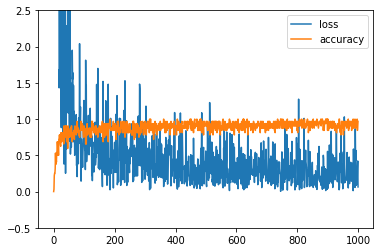

In [33]:
plt.ylim(-0.5, 2.5)
plt.plot(losses, label='loss')
plt.plot(accuracies, label='accuracy')
plt.legend(loc="upper right")
plt.show()

In [35]:
Y_test_preds = torch.argmax(model(torch.tensor(X_test_1.reshape((-1, 28*28))).float()), dim=1).numpy()
print("Accuracy: %.2f"%(100*(Y_test_1 == Y_test_preds).mean()), "%")

#~92% accuracy with PyTorch model

Accuracy: 92.03 %
